In [43]:
from matplotlib import pyplot as plt
import numpy as np
import random
import networkx as nx
import math
import scipy.special
from statistics import mean,stdev

# Part 1: Binning degree distributions


A. Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
  
<font color='#00008B'>
Numpy.histogram returns an array containing the number of items in each of the 10 bins and another array with the edges of each bin. The two arrays have different length as the edges one contains n + 1 elements (n being the number of bins). <br>
One easy solution is just to use the built in method plt.hist which deals with this difference of size in the arrays. However if ploting from scratch with a bar method, we can remove the last element of the edges array and add a width parameter calculated with the difference of each consecutives edges. This gives us an array of size n.</font>


<BarContainer object of 10 artists>

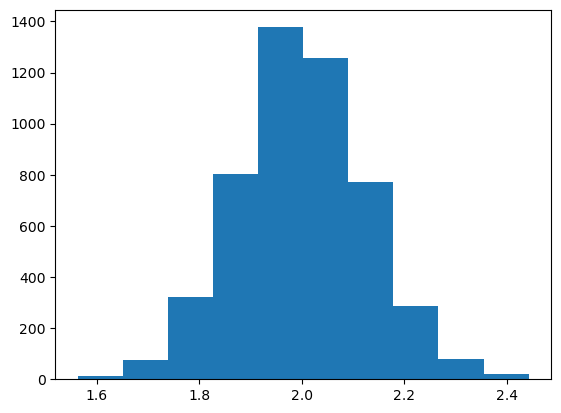

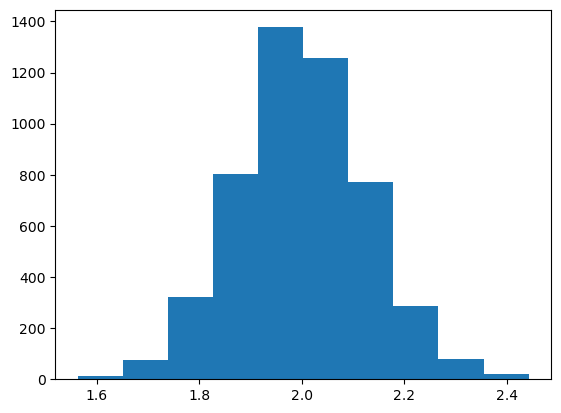

In [44]:
#Generation 500 data points from a Gaussian distribution
s = np.random.normal(2, 0.125, 5000)
#Binning the numbers into 10 bins
nb, bins = np.histogram(s,10)
#The two arrays (items per bin and size of each bin namely bin edges) have different length
plt.hist(s, bins) #easy way

#Using bar method from matplolib
#It is required to use the width of each bar and to use only the n-1 first edges of the bins
fig, ax = plt.subplots()
ax.bar(bins[:-1], nb, width=np.diff(bins), align="edge")


B. Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution
  <br>
  
 <font color='#00008B'>
It is correct to set the first entry of the vector $v$ to be the smallest value and the last entry the largest value in order to include these values into the binning. Since the bins are not centered on each integer, having this set up will make each bin corresponds to the integer on the right side edge. The sum over bin counts is the number of numbers drown from the distribution. The relation between first and last vector element and the min and max of the distribution is as described earlier in this paragraph.</font>

5000


<BarContainer object of 24 artists>

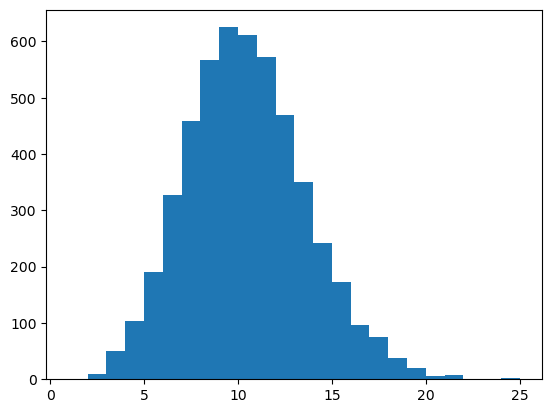

In [45]:
#Generating 5000 numbers drown from a Poisson distribution (lamda = 10)
s = np.random.poisson(10, 5000)
min_s = min(s)
max_s = max(s)

#Creating a vector containing all possible integers from min_s to max_s
v = np.linspace(min_s, max_s, max_s)

#Binning the random numbers into the generated vector
nb, bins = np.histogram(s,v)
print(sum(nb))

fig, ax = plt.subplots()
ax.bar(bins[:-1], nb, width=np.diff(bins), align="edge")

C. Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
  
  <br>
  <font color='#00008B'>
Given that $\langle k \rangle = p (N-1)$ we derive p from the equation with the average degree, $k = 10$ </font>

Text(0, 0.5, 'Number of nodes')

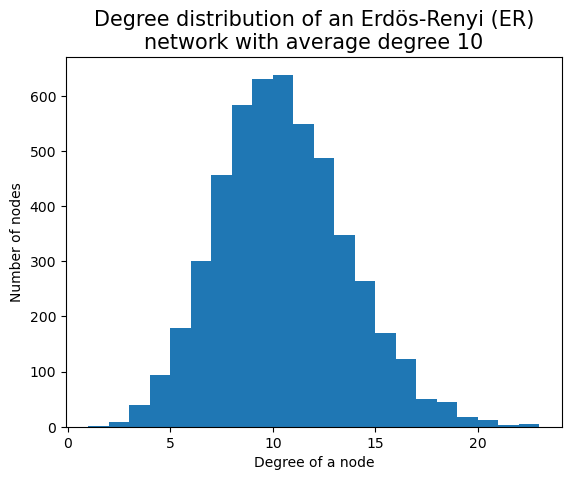

In [46]:
#Values to be used for the Erdös-Renyi (ER) network
p = 10 / (5000-1)
N = 5000
G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)

#Returns the degree distribution of our network
degree_distribution = sorted((d for n, d in G.degree()), reverse=True)

#Generating a bar plot of the degree distribution following the same method as previously
min_s = min(degree_distribution)
max_s = max(degree_distribution)

v = np.linspace(min_s, max_s, max_s)

nb, bins = np.histogram(degree_distribution,v)

fig, ax = plt.subplots()
ax.bar(bins[:-1], nb, width=np.diff(bins), align="edge")
ax.set_title("Degree distribution of an Erdös-Renyi (ER)"+ "\n" + "network with average degree 10",fontsize = 15)
ax.set_xlabel("Degree of a node")
ax.set_ylabel("Number of nodes")

# Part 2: Random networks and plotting in `networkx`
 
A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.


In [47]:
#Erdős-Rényi Networks

N = 3000
p = 10e-3
L_exp = p*(N*(N-1))/2
print('Expected number of links : {}'.format(L_exp))
D_avg = p*(N-1)
print('Average degree : {}'.format(D_avg))

print("Network is in connected regime" if D_avg > math.log(N) else"Network is not in connected regime" ) #Returns True hence the network is in Connected Regime

pc = 1/N
print('Probably pc so that network is at cricital point : {}'.format(pc))

#When <k> = ln(N) then we expect to have only one component
#We have  p*(N-1) = ln (N) -> N = 648 (Wolfram Alpha equation solved) 
Ncr = 648
print('Number of nodes with p = 10e-3 so that the network has only one component : {}'.format(Ncr ))

#Network in d) Super critical regime
kcr = math.log(N)
print('Average degree for the network in super critical regime : {}'.format(kcr ))
d_avg = 1
print('Average distance between randomly chosen nodes : {}'.format(d_avg))

#Degree distribution pk for the network
pk = scipy.special.binom(N-1, D_avg)* (p**D_avg) * ((1-p)**(N-1-D_avg))
print('Degree distribution : {}'.format(pk))


Expected number of links : 44985.0
Average degree : 29.990000000000002
Network is in connected regime
Probably pc so that network is at cricital point : 0.0003333333333333333
Number of nodes with p = 10e-3 so that the network has only one component : 648
Average degree for the network in super critical regime : 8.006367567650246
Average distance between randomly chosen nodes : 1
Degree distribution : 0.07301252746883477



B. Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

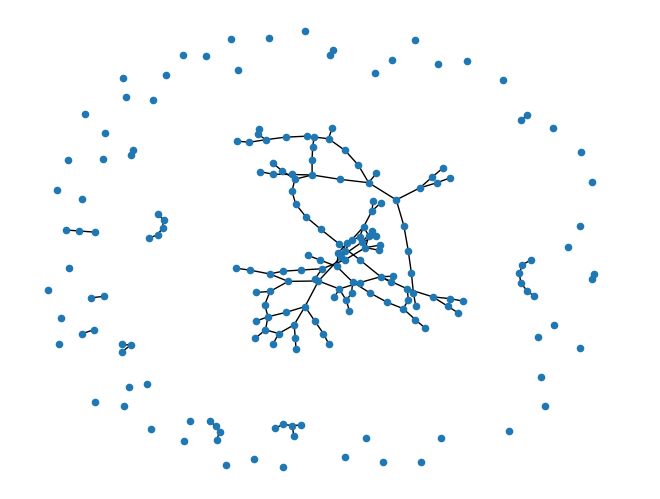

In [48]:
#Random network with 200 nodes and an average degree of 1.5
G = nx.erdos_renyi_graph(200, p = 1.5 / (200-1), seed=None, directed=False)
nx.draw_spring(G,node_size = 20)

Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)

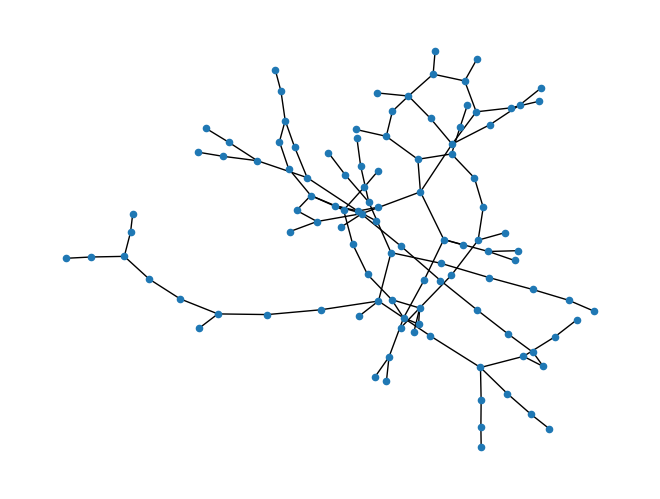

In [49]:
#Extraction of the giant component
largest_cc = max(nx.connected_components(G), key=len)
S = G.subgraph(largest_cc).copy() 
nx.draw_spring(S,node_size = 20)

  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

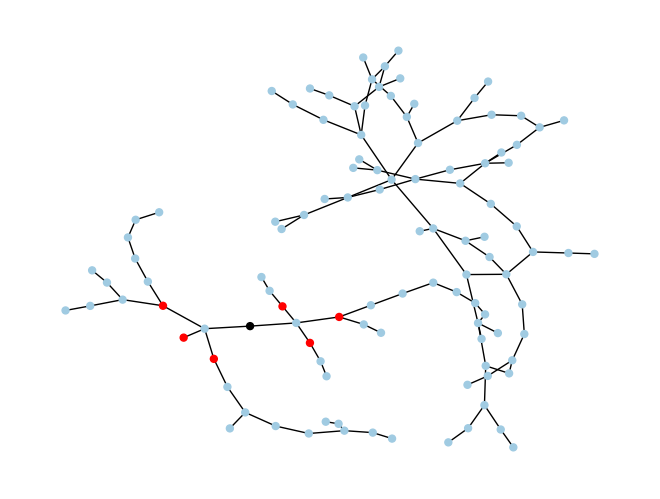

In [50]:
from random import choice

random_node = choice(list(S.nodes()))
paths=nx.single_source_shortest_path_length(G=S,source=random_node,cutoff=2)

color_map = []
for node in S:
    if node == random_node:
        color_map.append('#000000')
    elif node in paths:
        if paths[node] == 2:
            color_map.append('#ff0000')
        else: 
            color_map.append('#A0CBE2')
    else: 
        color_map.append('#A0CBE2')  

nx.draw_spring(S, node_color=color_map, node_size = 25)

# Part 3: Watts-Strogatz Networks

A. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

  <br>
  <font color='#00008B'>
When p=1 we get a random network.</font>


With probability P0, the average shortest path lenght is 62.875751503006015
With probability P0.1, the average shortest path lenght is 7.284232464929859
With probability P1, the average shortest path lenght is 4.7392545090180365


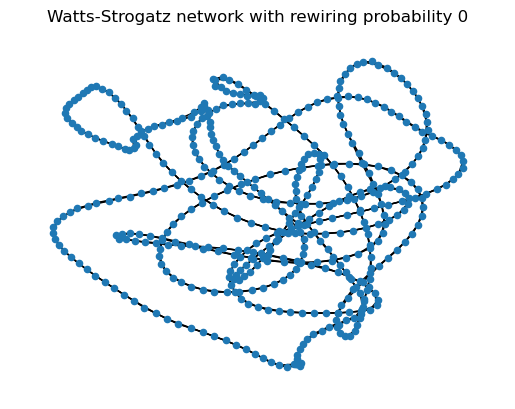

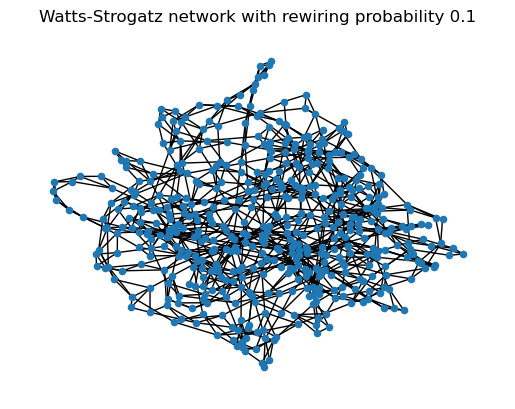

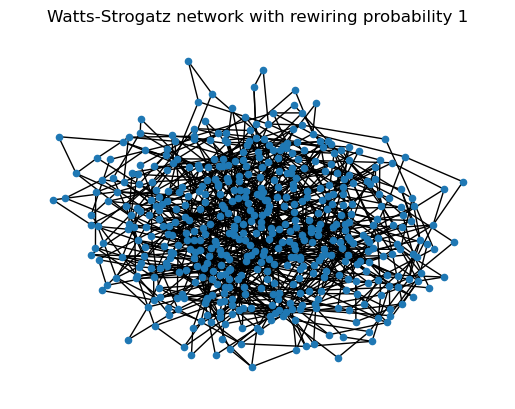

In [51]:
for index,p in enumerate([0,0.1,1]):
    G = nx.watts_strogatz_graph(500,4,p)
    plt.figure(index)
    plt.title("Watts-Strogatz network with rewiring probability {}".format(p))
    nx.draw_spring(G,node_size = 20)
    print("With probability P{}, the average shortest path lenght is {}".format(p,nx.average_shortest_path_length(G)))

B. Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [52]:
avg_d = []
std = []
p = [0,0.01,0.03,0.05,0.1,0.2]
for index,p in enumerate(p):
    print("Generating 50 networks for p={} ...".format(p))
    d=[]
    for _ in range(50):
        G = nx.watts_strogatz_graph(500,4,p)
        average_degree = nx.average_shortest_path_length(G)
        d.append(average_degree)
    avg_d.append(mean(d))
    std.append(stdev(d))
                

Generating 50 networks for p=0 ...
Generating 50 networks for p=0.01 ...
Generating 50 networks for p=0.03 ...
Generating 50 networks for p=0.05 ...
Generating 50 networks for p=0.1 ...
Generating 50 networks for p=0.2 ...


ValueError: 'x' and 'y' must have the same size

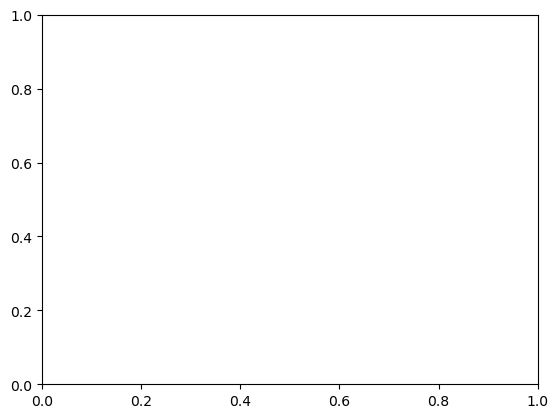

In [53]:
plt.errorbar(p,avg_d, yerr=std, marker='s',ms=4,capsize=5)
plt.title("Average degree over 50 networks with different rewiring probabilities")
plt.ylabel("Average <d>")
plt.xlabel("Rewiring probability p")

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success


In [54]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)

In [55]:
def flatten_edges(G):
    nodes = []
    for edge in list(G.edges()):
        nodes.append(edge[0])
        nodes.append(edge[1])
    return(nodes)

In [56]:
#Initialisation
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)

#Adding nodes connecting them in proportion to the degree of existing nodes
i = 3
while(G.number_of_nodes() < 5000):
    nodes = flatten_edges(G)
    selected = random.choice(nodes)
    G.add_node(i)
    G.add_edge(i, selected)
    i+=1
    
    

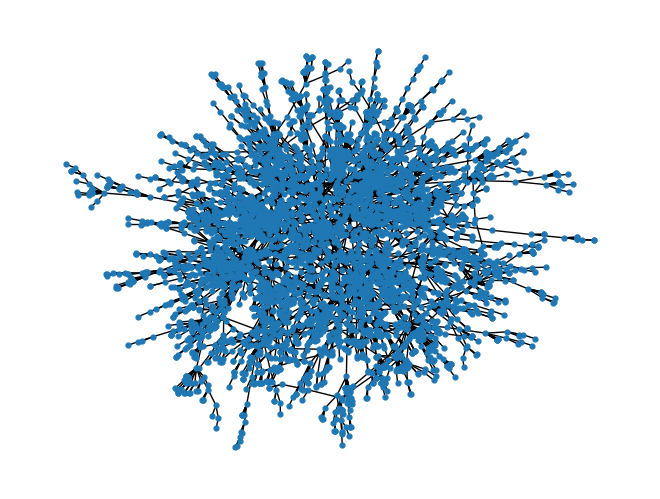

In [ ]:
nx.draw_spring(G,node_size = 12)

In [57]:
#We create a class BANetwork to ease the usage
class BANetwork:
    def __init__(self, N_nodes):
            G = nx.Graph()
            G.add_node(1)
            G.add_node(2)
            G.add_edge(1, 2)
            i = 3
            while(G.number_of_nodes() < N_nodes):
                nodes = flatten_edges(G)
                selected = random.choice(nodes)
                G.add_node(i)
                G.add_edge(i, selected)
                i+=1
            self.G = G
            self.degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            self.dmax = max(self.degree_sequence)
            self.dmin = min(self.degree_sequence)
    
    def __len__(self):
        return self.G.number_of_nodes()

    def __getitem__(self, item):
         return self.G[item]

    def graph(self):       
        return G

    def draw(self):
        nx.draw_spring(self.G,node_size = 12)
        
    def plot_degree_distribution(self,log=False):
        #Creating a vector containing all possible integers from min_s to max_s
        v = np.linspace(self.dmin, self.dmax, self.dmax)

        #Binning the random numbers into the generated vector
        nb, bins = np.histogram(self.degree_sequence,v)
        
        #We convert the bins output in an array of same lenght as the count to be able to plot a scatter plot
        bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(nb))]
        fig, ax = plt.subplots()
        fig.set_figheight(2)
        ax.scatter(bins_mean, nb, s=5)
        ax.set_xlabel("k")
        ax.set_ylabel("count")
        
        if log:
            ax.set_yscale('log')
            ax.set_xscale('log')


In [ ]:
BA= BANetwork(5000)


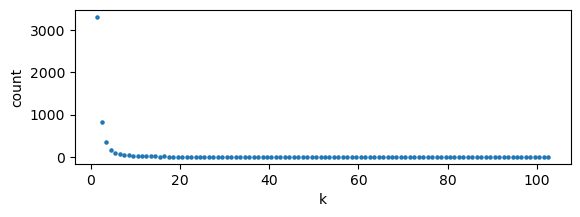

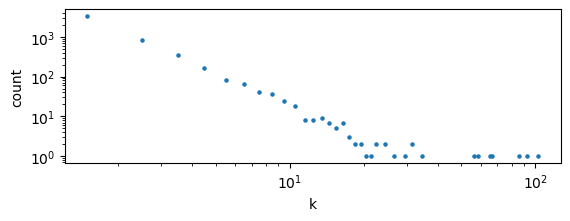

In [ ]:
BA.plot_degree_distribution()
BA.plot_degree_distribution(log=True)

A. Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.


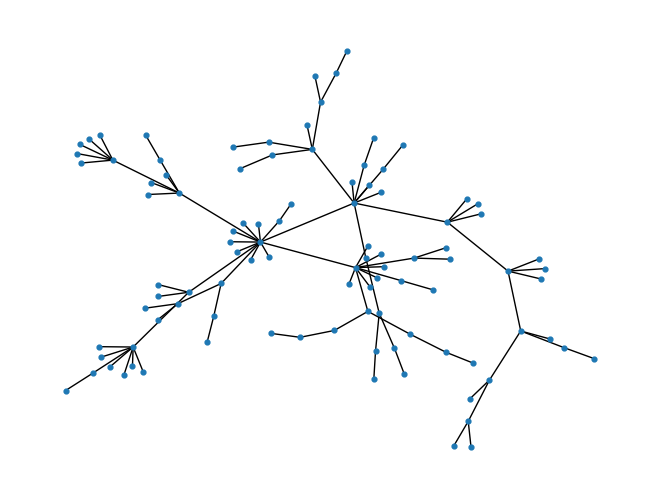

In [ ]:
BA= BANetwork(100) #Using our own class
BA.draw() 

B. Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

Maximum degree 134
Minimum degree 1


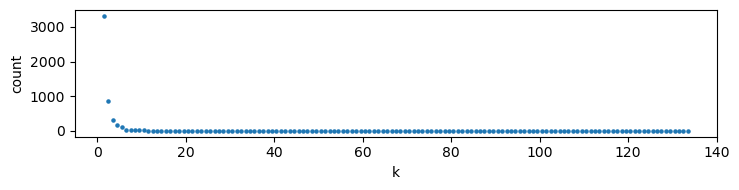

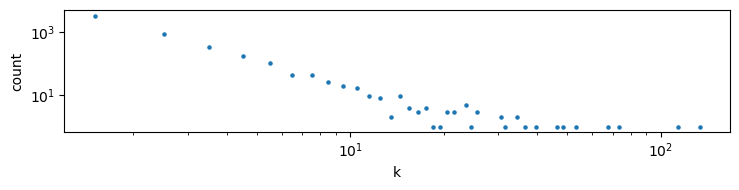

In [226]:
BA= BANetwork(5000) #Using our own class
print("Maximum degree", BA.dmax)
print("Minimum degree", BA.dmin)
BA.plot_degree_distribution() #Using our own method defined above
BA.plot_degree_distribution(log=True) #Using our own method defined above

## Part 5. Power-laws and the friendship paradox

### A. The friendship paradox in BA networks

- Pick a node *i* at random and find it's degree
- Find *i*'s neighbors and calculate their average
- Compare the two numbers to check if it's true that *i*'s friends on average have more friends than *i*
- Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [114]:
F_BA = BANetwork(5000)

In [259]:
import statistics

def friend_paradox(graph: nx.Graph):
    average_is_higher = 0
    neighbor_average_degree = 0
    for _ in range(1000):
        node = random.choice(list(graph.nodes))
        node_degree = graph.degree[node]

        neighbor_average_degree = sum(graph.degree(n) for n in graph.neighbors(node)) / len(list(graph.neighbors(node)))
        if neighbor_average_degree > node_degree:
            average_is_higher += 1

    print("In {}/1000 cases, the friends of i had more friends, on average".format(average_is_higher))

friend_paradox(F_BA.graph())
degrees = [d for n, d in F_BA.graph().degree()]
print("median degree: ", statistics.median(degrees))




In 864/1000 cases, the friends of i had more friends, on average
median degree:  1.0


### B. The Friendship paradox more generally
 - Think about what it would mean in terms of hubs that the power law is flatter?

    *If the power law is flatter, then the distribution will be less weighted by node degrees, the higher their degree is, and therefore more equally distributed among the nodes i.e. less number of nodes with extreme number of connections and higher median*

- Simulate a network with the slope mentioned. 


In [227]:
def generate_sequence(alpha):
    seq = []
    for _ in range(5000):
        seq.append(np.around( (1-np.random.uniform(low=0.001, high=1.0))**(-1/alpha-1)))
        
    seq = np.array(sorted(seq,reverse=True ))
    seq = seq.astype(int)
    return seq



In 993/1000 cases, the friends of i had more friends, on average
median degree:  2.0


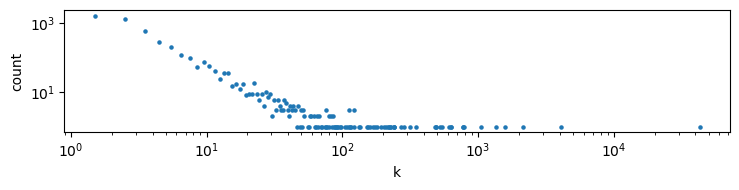

In [236]:
import statistics

def generate_network_with_slope():

    # generating this powerlaw sequence takes 12 min
    sequence = np.around(sorted(nx.utils.powerlaw_sequence(5000), reverse=True), 0)
    sequence = sequence.astype(int)
    if (sum(sequence) % 2 != 0):
        sequence[0] += 1

    G = nx.configuration_model(sequence)

    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    dmin = min(degree_sequence)
    v= np.linspace(dmin, dmax, dmax)
    nb, bins = np.histogram(degree_sequence,v)

    bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(nb))]
    fig, ax = plt.subplots()
    fig.set_figheight(2)
    ax.scatter(bins_mean, nb, s=5)
    ax.set_xlabel("k")
    ax.set_ylabel("count")
    ax.set_yscale('log')
    ax.set_xscale('log')

    friend_paradox(G)
    degrees = [d for n, d in G.degree()]
    print("median degree: ", statistics.median(degrees))

generate_network_with_slope()


- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

*The previous reasoning seems to be partly right, the median value of degrees indeed seems to be higher, but there is actally more nodes with extreme degree. The fraction for which the friendship paradox is correct is now now almost the complete sample of 1000 nodes, likely because of the the higher number of nodes with extreme degrees, swaying the average degree of neighbors to a much higher value.*


- Now generate a network for the configuration model that has the same slope and number of nodes as F-BA in 5.A above; let's call this new network F-CM (for friendship configuration model).

In [248]:
F_CM = nx.configuration_model([d for n, d in F_BA.graph().degree()]) 

friend_paradox(F_CM)

In 649/1000 cases, the friends of i had more friends, on average


The fraction where the friendship paradox is true is much smaller than previous cases. Some of the causes of this: 
* In F_BA, nodes are added based on preferential attachment, meaning that some nodes with high degrees are hubs that create clusters around them. These are more likely to show up as a neighbor, in a sample, and skew the average higher. Therefore, with F_BA, a higher fraction of the friendship paradox will be true.
*  In F_CM, even though we have the same degree distribution, there is no preferential attachment and which makes it closer to a random network, with less and smaller hubs. 

## Part 6. Growth without Preferential Attachment

* Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, but have the incoming nodes connect to the existing nodes with equal probability. Let's call this the Sune-network.
* Generate an ER network of same size and same  as the Sune-network. 

In [310]:
#We create a class BANetwork to ease the usage
class SuneNetwork:
    def __init__(self, N_nodes):
            G = nx.Graph()
            G.add_node(1)
            G.add_node(2)
            G.add_edge(1, 2)
            i = 3
            while(G.number_of_nodes() < N_nodes):
                nodes = list(G.nodes)
                selected = random.choice(nodes)
                G.add_node(i)
                G.add_edge(i, selected)
                i+=1
            self.G = G
            self.degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
            self.dmax = max(self.degree_sequence)
            self.dmin = min(self.degree_sequence)
    
    def __len__(self):
        return self.G.number_of_nodes()

    def __getitem__(self, item):
         return self.G[item]

    def graph(self):       
        return G



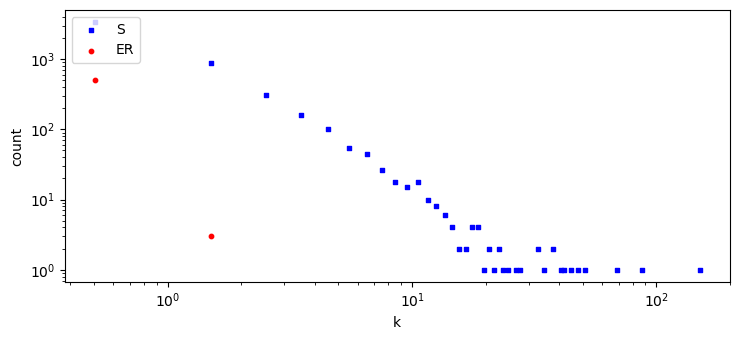

In [311]:
S = SuneNetwork(5000)
ER = nx.erdos_renyi_graph(500, p = 1 / (5000-1), seed=None, directed=False)

degree_sequence_S = sorted((d for n, d in S.graph().degree()), reverse=True)
degree_sequence_ER = sorted((d for n, d in ER.degree()), reverse=True)
dmax = max(degree_sequence_S + degree_sequence_ER)
dmin = min(degree_sequence_S + degree_sequence_ER)

v = np.linspace(dmin, dmax, dmax)

#Binning the random numbers into the generated vector
nb_S, bins_S = np.histogram(degree_sequence_S,v)
nb_ER, bins_ER = np.histogram(degree_sequence_ER,v)

bins_mean_S = [0.5 * (bins_S[i] + bins_S[i+1]) for i in range(len(nb_S))]
bins_mean_ER = [0.5 * (bins_ER[i] + bins_ER[i+1]) for i in range(len(nb_ER))]


fig, ax = plt.subplots()
ax.scatter(bins_mean_S, nb_S, s=10, c='b', marker="s", label='S')
ax.scatter(bins_mean_ER, nb_ER, s=10, c='r', marker="o", label='ER')
ax.set_xlabel("k")
ax.set_ylabel("count")
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend(loc='upper left');
plt.show()

- What are the differences between the ER network and the Sune-network? 

*Based on the plot, it seems that ER has a more evenly distributed degree among its nodes, whereas S has more hubs. This is likely the result of the growing factor of S, meaning that even though the attachment has equal probability among nodes, the nodes that are added in the beginning are part of the selection pool more times than those added later, therefore they are more likely to have a higher degree.  